# ML&Fintech HW1 Part 1

## Problem 8

This exercise relates to the `College` data set, which can be found in the file `College.csv` on the book website. It contains a number of variables for 777 different universities and colleges in the US. The variables are
* `Private` : Public/private indicator
* `Apps` : Number of applications received
* `Accept`: Number of applicants accepted
* `Enroll` : Number of new students enrolled
* `Top10perc` : New students from top 10% of high school class
* `Top25perc` : New students from top 25% of high school class
* `F.Undergrad` : Number of full-time undergraduates
* `P.Undergrad` : Number of part-time undergraduates
* `Outstate` : Out-of-state tuition
* `Room.Board` : Room and board costs
* `Books` : Estimated book costs
* `Personal` : Estimated personal spending
* `PhD` : Percent of faculty with Ph.D.s
* `Terminal` : Percent of faculty with terminal degree
* `S.F.Ratio` : Student/faculty ratio
* `perc.alumni` : Percent of alumni who donate
* `Expend` : Instructional expenditure per student
* `Grad.Rate` : Graduation rate
  
Before reading the data into `Python`, it can be viewed in Excel or a text editor.

Setup: importing the packages.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dcor

(a) Use the `pd.read\_csv()` function to read the data into `Python`. Call the loaded data `college.csv` Make sure that you have the directory set to the correct location for the data.

In [3]:
college = pd.read_csv("C:/Users/benny/Documents/ML_and_fintech/project/HW1/College.csv")

---

(b) Look at the data used in the notebook by creating and running a new cell with just the code `college` in it. You should notice that the first column is just the name of each university in a column named something like `Unnamed: 0`. We don’t really want `pandas` to treat this as data. However, it may be handy to have these names for later. Try the following commands and similarly look at the resulting data frames:
```python
college2 = pd.read_csv('College.csv', index_col=0)
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')
```

This has used the first column in the file as an `index` for the data frame. This means that `pandas` has given each row a name corresponding to the appropriate university. Now you should see that the first data column is `Private`. Note that the names of the colleges appear on the left of the table. We also introduced a new python object above: a *dictionary*, which is specified by `(key, value)` pairs. Keep your modified version of the data with the following:

In [4]:
college2 = pd.read_csv('College.csv', index_col=0)
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')

college = college3

---

(c) Use the `describe()` method of to produce a numerical summary of the variables in the data set.

In [5]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


---

(d) Use the `pd.plotting.scatter_matrix()` function to produce a scatterplot matrix of the first columns `[Top10perc, Apps, Enroll]`. Recall that you can reference a list `C` of columns of a data frame `A` using `A[C]`.

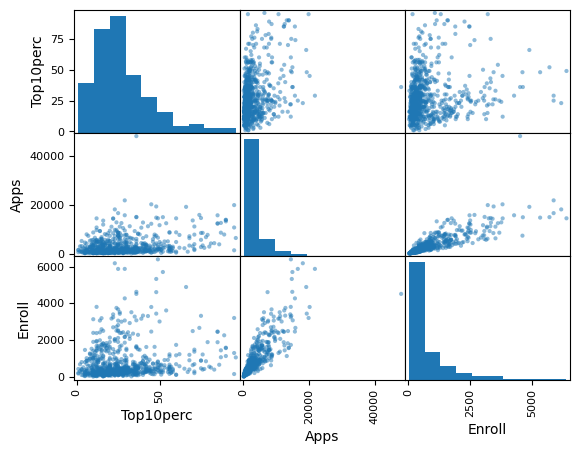

In [37]:
ax = pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']])

---

(e) Use the `boxplot()` method of `college` to produce side-by-side boxplots of `Outstate` versus `Private`.

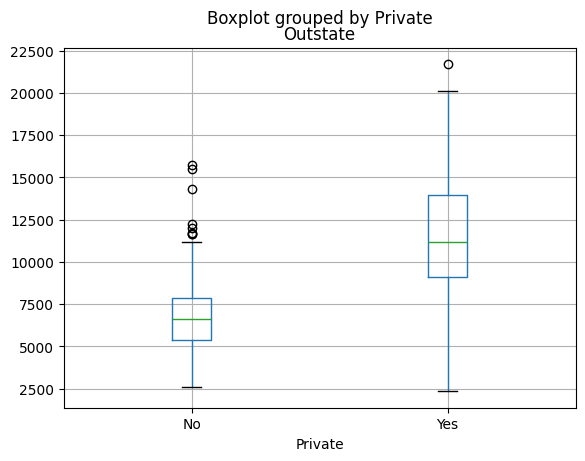

In [36]:
ax = college.boxplot(column='Outstate', by='Private')

---

(f) Create a new qualitative variable, called `Elite`, by *binning* the `Top10perc` variable into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%.
```python
college['Elite'] = pd.cut(college['Top10perc'], [0,0.5,1], labels=['No', 'Yes'])
```
Use the `value_counts()` method of `college['Elite']` to see how manyelite universities there are. Finally, use the `boxplot()` method again to produce side-by-side boxplots of `Outstate` versus `Elite`.

<span style="color:blue">Personal Idea:</span> I think here `[0,0.5,1]` should be corrected as `[0,50,100]`. 

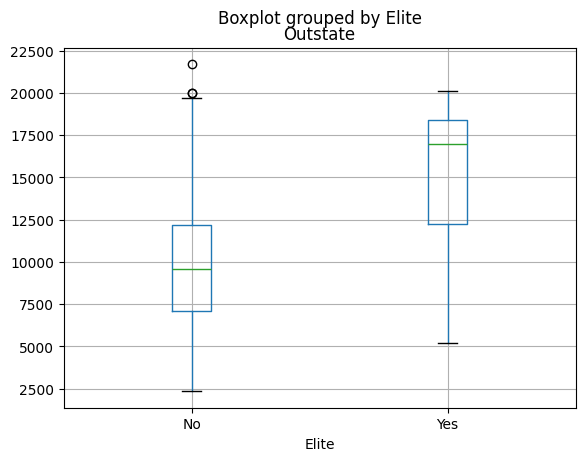

In [35]:
college['Elite'] = pd.cut(college['Top10perc'], [0,50,100], labels=['No', 'Yes'])
college['Elite'].value_counts()
ax = college.boxplot(column='Outstate', by='Elite')

---

(g) Use the `plot.hist()` method of `college` to produce some histograms with differing numbers of bins for a few of the quantitative variables. The command `plt.subplots(2, 2)` may be useful: it will divide the plot window into four regions so that four plots can be made simultaneously. By changing the arguments you can divide the screen up in other combinations.

I picked `Apps`, `Accept` and `Enroll` for the production of the histogram.

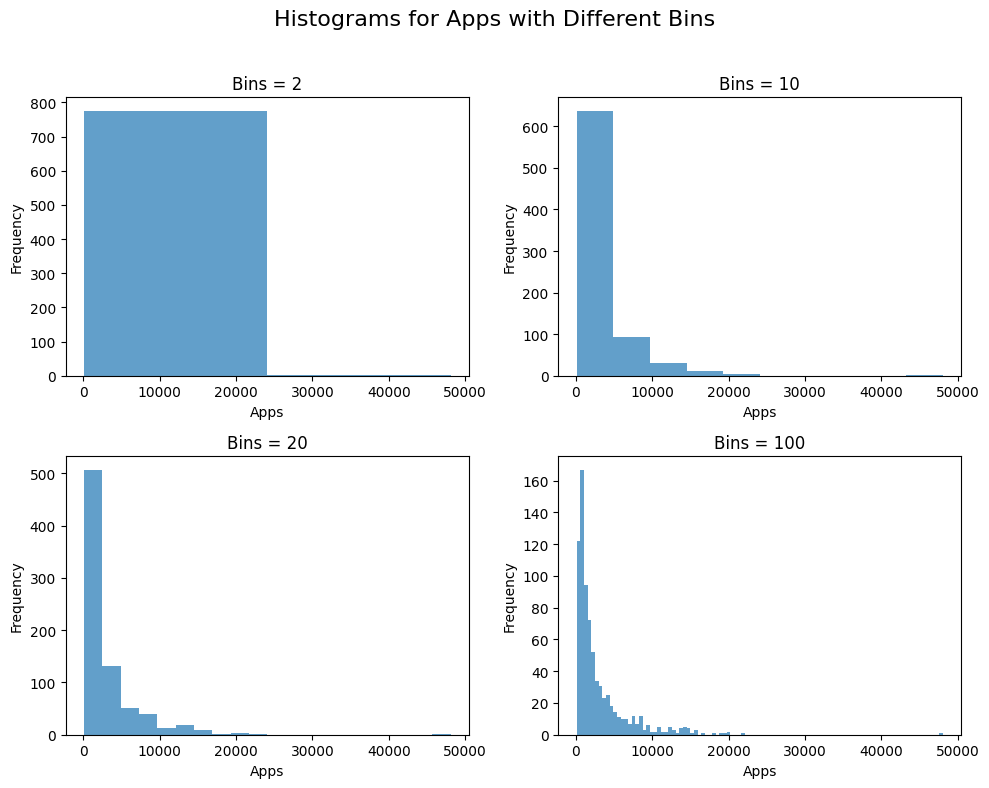

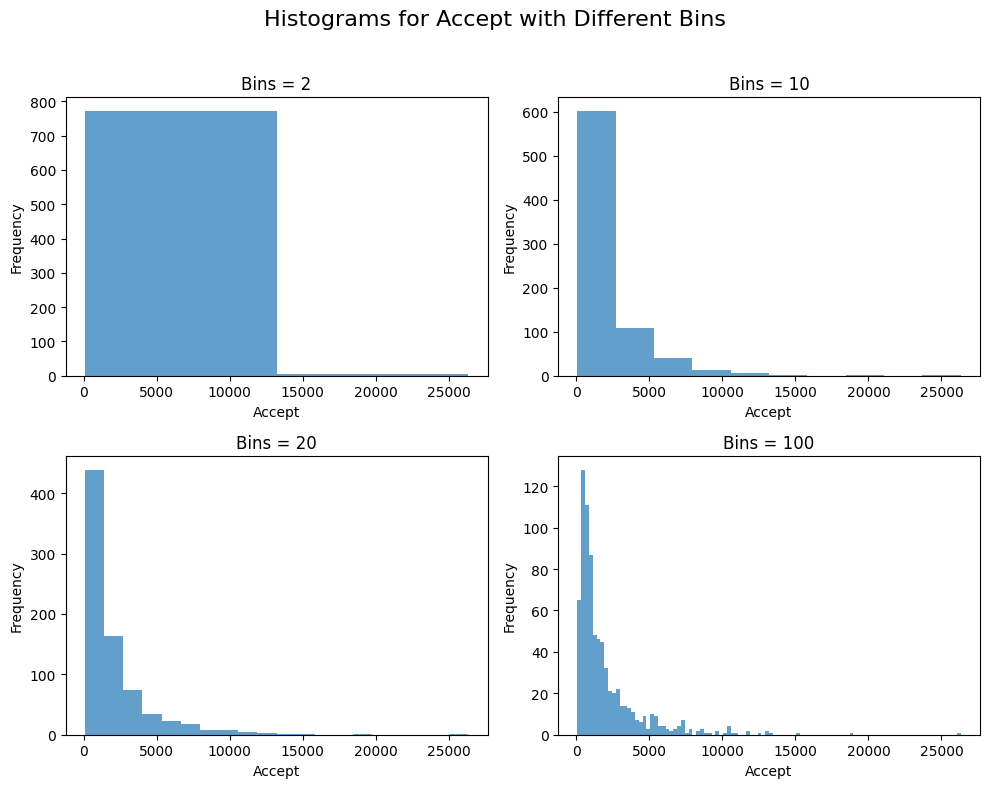

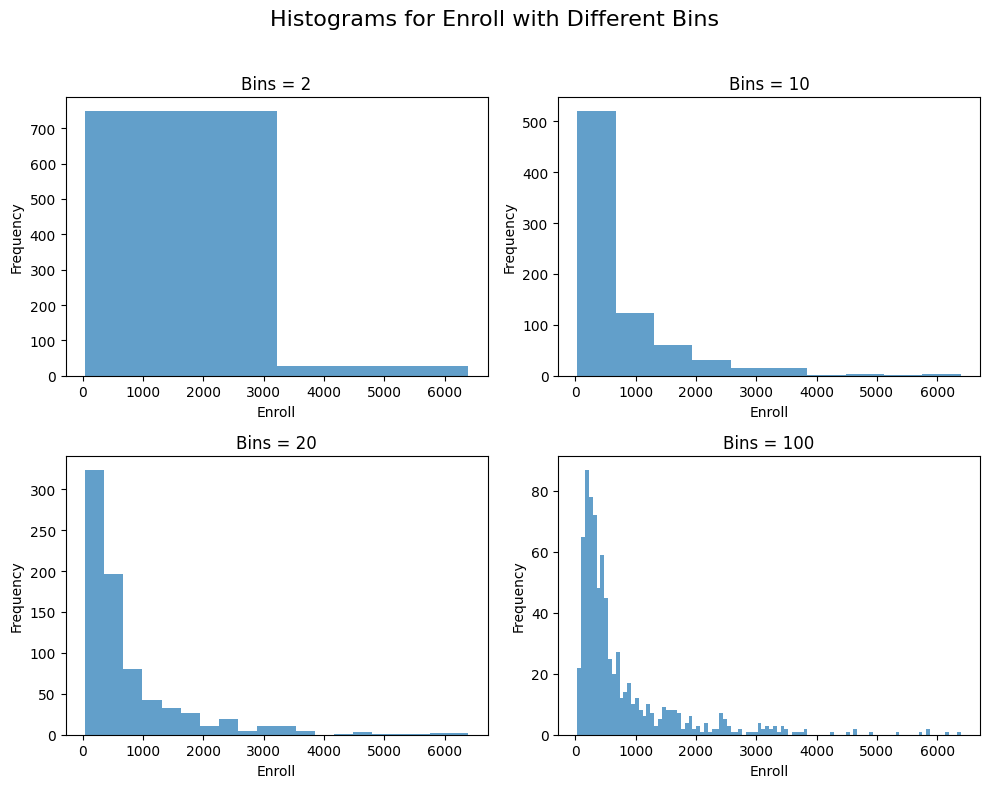

In [9]:
# The three main variables to plot
main_variables = ['Apps', 'Accept', 'Enroll']

# The different bin numbers to use for the subplots
bin_numbers = [2, 10, 20, 100]

# Loop through each variable to create a separate figure for each
for var in main_variables:
    
    # Create a new, separate figure and a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    
    # Flatten the axes array to make it easy to loop through
    axes = axes.flatten()
    
    # Set a main title for the entire figure
    fig.suptitle(f'Histograms for {var} with Different Bins', fontsize=16)
    
    # Loop through the bin numbers and plot each histogram on its own subplot
    for i, bins in enumerate(bin_numbers):
        # Plot the histogram on the specific subplot 'axes[i]'
        college[var].plot.hist(ax=axes[i], bins=bins, alpha=0.7)
        
        # Set titles and labels for the individual subplots
        axes[i].set_title(f'Bins = {bins}', fontsize=12)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Frequency')

    # Adjust the layout to ensure everything fits without overlapping
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    # Display the plot. This will show one plot and then the loop will
    # create and show the next one.
    plt.show()

---

(h) Continue exploring the data, and provide a brief summary of what you discover.

We first run the *heat map* to check the correlation between each data/variable.

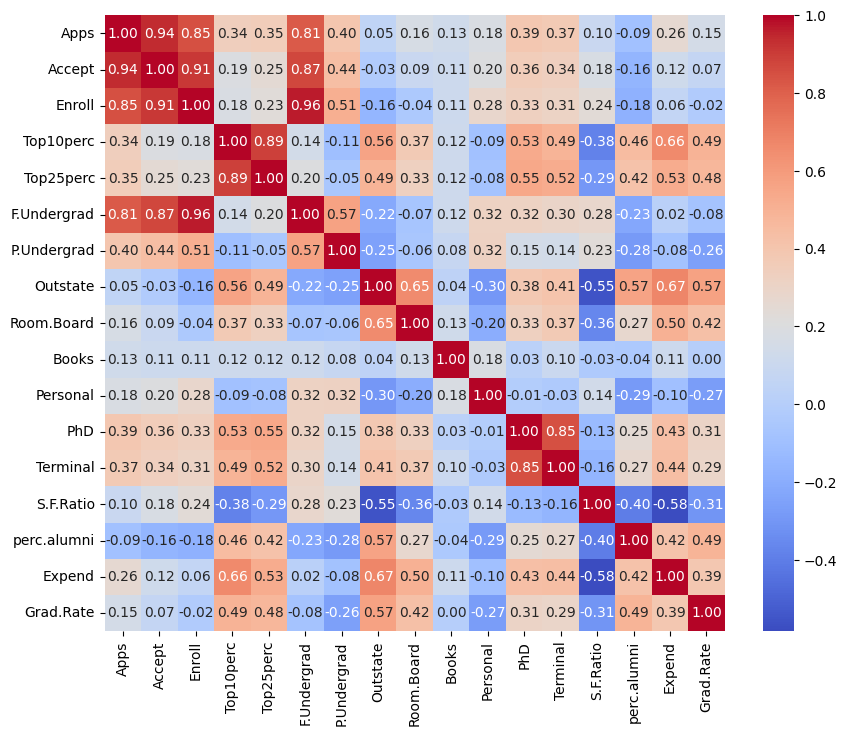

In [34]:
quantitative_vars = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']

# Calculate the correlation matrix
correlation_matrix = college[quantitative_vars].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm',
    fmt=".2f"
)

It seems like `Apps`, `Accept`, `Enroll` and `F.Undergrad` are highly correlated; so is `PhD` and `Terminal`; `Top10perc` and `Top25perc` as well.

I first investigate the relationships between `Apps`, `Accept`, `Enroll` and `F.Undergrad`. Also compare the *correlation* before and after taking the logrithm.

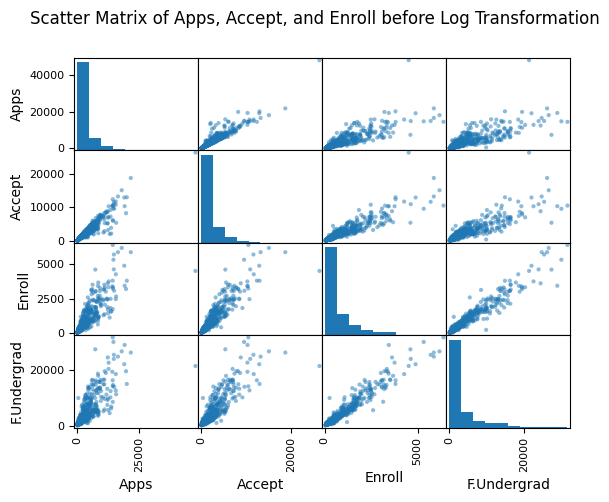

In [31]:
pd.plotting.scatter_matrix(college[['Apps', 'Accept', 'Enroll', 'F.Undergrad']])
title = plt.suptitle('Scatter Matrix of Apps, Accept, and Enroll before Log Transformation')

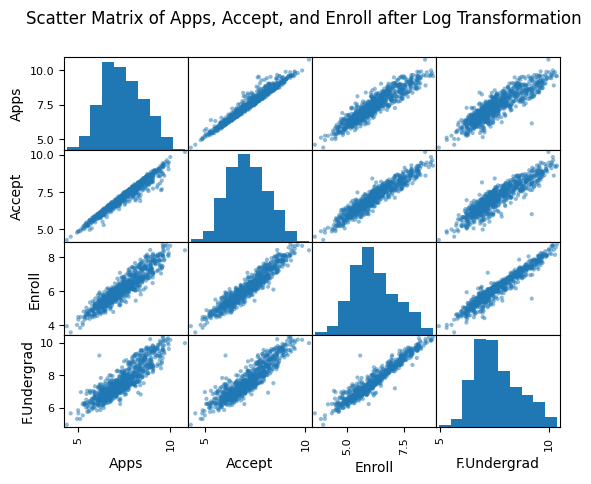

In [30]:
apps_log = np.log(college['Apps'] + 1)
accept_log = np.log(college['Accept'] + 1)
enroll_log = np.log(college['Enroll'] + 1)
f_undergrad_log = np.log(college['F.Undergrad'] + 1)
pd.plotting.scatter_matrix(pd.DataFrame({'Apps': apps_log, 'Accept': accept_log, 'Enroll': enroll_log, 'F.Undergrad': f_undergrad_log}))
title = plt.suptitle('Scatter Matrix of Apps, Accept, and Enroll after Log Transformation')

We then investigate the relation ship between `Top10perc` and `Top25perc`.

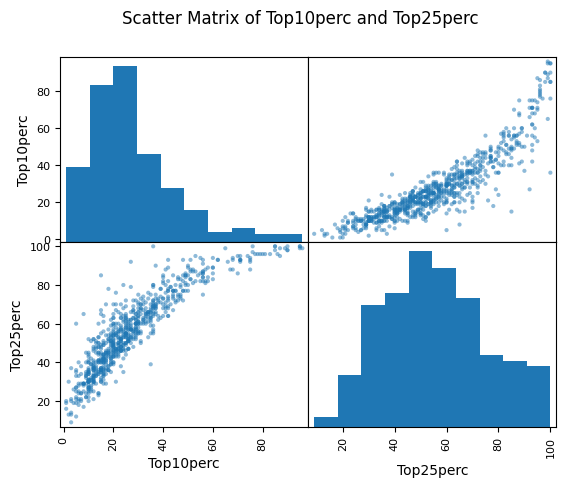

In [29]:
pd.plotting.scatter_matrix(college[['Top10perc', 'Top25perc']])
title = plt.suptitle('Scatter Matrix of Top10perc and Top25perc')

We can instantly notice that the correlation is kind of **nonlinear**, hence we need to consider some other methods to measure it. Let's give *distance correlation* a try. 

In [14]:
print("--- Distance Correlation Investigation ---")

# Transfering the data type to float64
college['Top10perc'] = college['Top10perc'].astype('float64')
college['Top25perc'] = college['Top25perc'].astype('float64')

# Calculate distance correlation for Top10perc vs. Top25perc
dcor_top_perc = dcor.distance_correlation(college['Top10perc'], college['Top25perc'])
print(f"\nDistance Correlation between Top10perc and Top25perc: {dcor_top_perc:.4f}")

--- Distance Correlation Investigation ---

Distance Correlation between Top10perc and Top25perc: 0.8954


The method gives `distance correlation` = 0.8954, which is slightly higher than the original `correlation`  = 0.891995, which draws the conclusion that the relationship between `Top10perc` and `Top25perc` is considered **linear** enough.

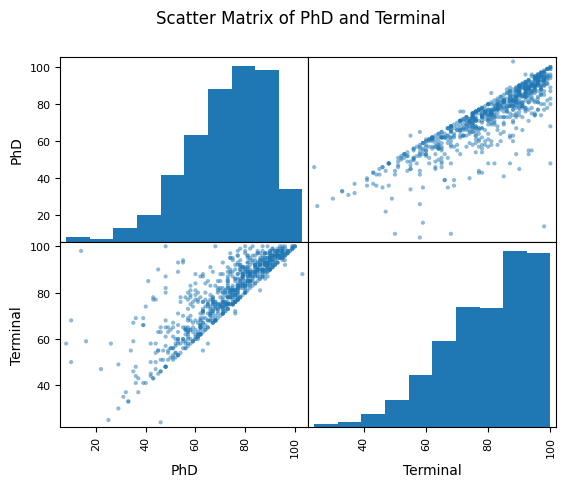

In [28]:
ax = pd.plotting.scatter_matrix(college[['PhD', 'Terminal']])
title = plt.suptitle('Scatter Matrix of PhD and Terminal')

The ralation is somehow like `Terminal`$\leq\,\alpha\cdot$`PhD`$+b$ for some $\alpha \in\mathbb R^+,\;b\in\mathbb R^-$ ($b$ here is observed -20; $\alpha$, 1.25).\
It is believed that the pattern shows like that is because `PhD` is part of `Terminal` while the inverse inclusion does not hold.

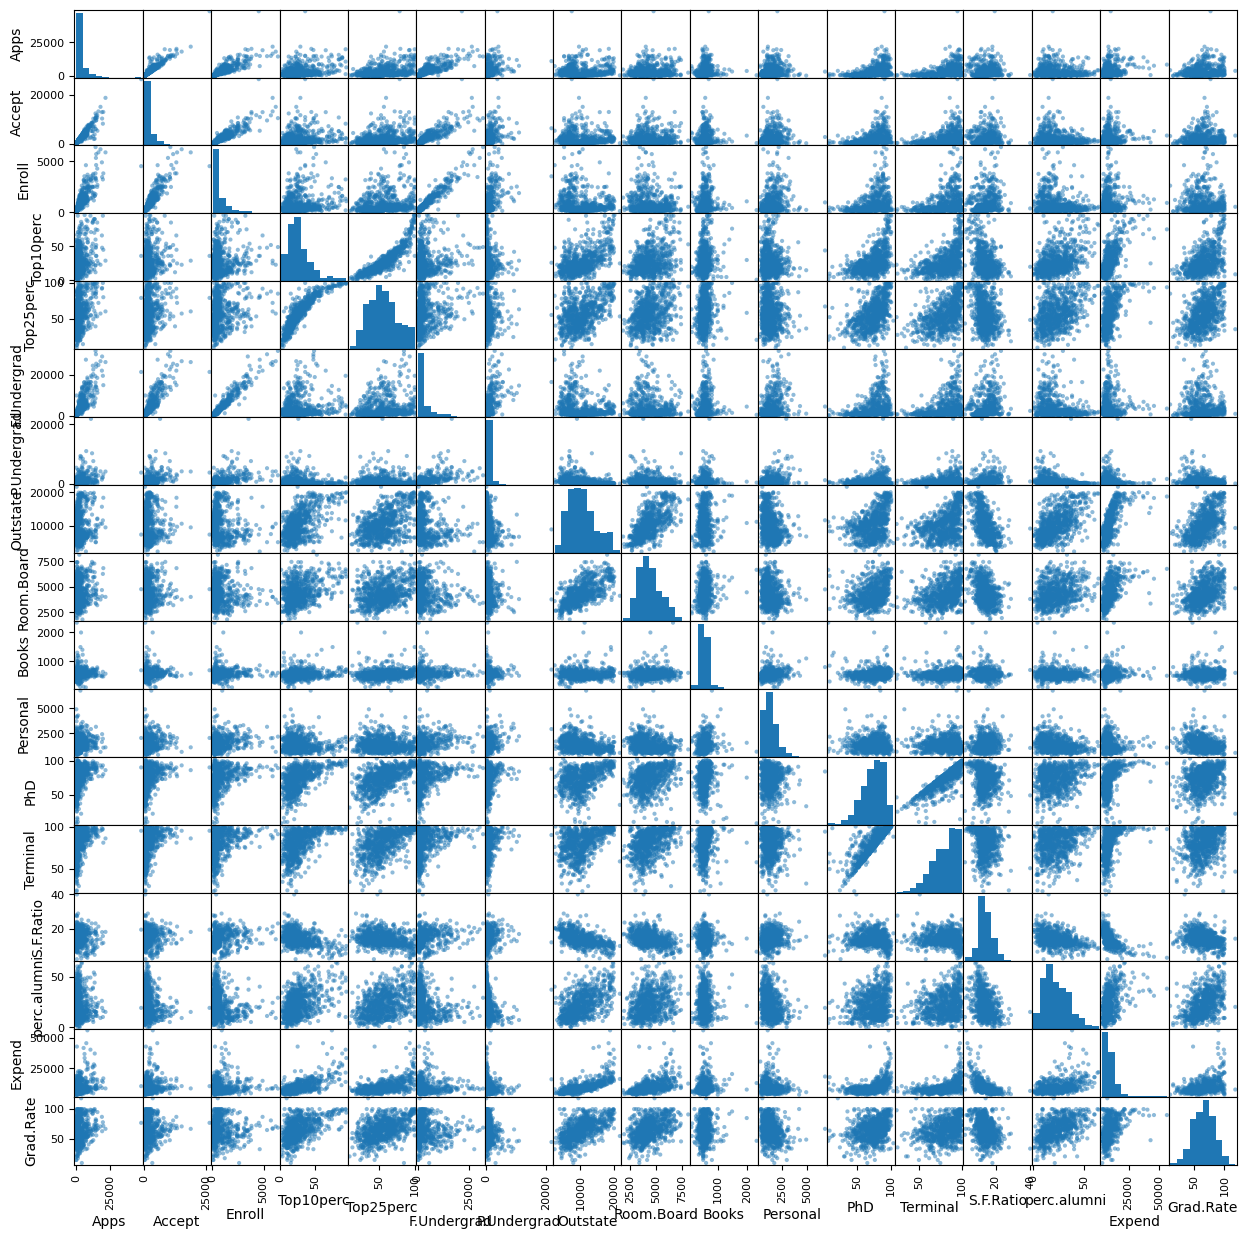

In [23]:
ax = pd.plotting.scatter_matrix(college, figsize=(15, 15))

By plotting the scatter matrix, it is easy to find that most of the variables are **positive skewed**, while `PhD` and `Terminal` are **negative shewed**.\
`S.F.Ratio`, `perc.alumni` and `Grad.Rate` are relatively **symmetrically** distributed.